<a href="https://colab.research.google.com/github/EmersonFranca/IDH_Atlas/blob/master/Analise_Exploratoria/1_Analise_Exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import xgboost
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import probplot

# 2. Versões das bibliotecas importadas

In [3]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)


1.0.3
1.18.4
0.10.1


# 3. Importando os dados

In [0]:
URL_IDH_1991 = "https://github.com/EmersonFranca/IDH_Atlas/blob/master/Dados/IDH_1991.csv?raw=true"
URL_IDH_2000 = "https://github.com/EmersonFranca/IDH_Atlas/blob/master/Dados/IDH_2000.csv?raw=true"
URL_IDH_2010 = "https://github.com/EmersonFranca/IDH_Atlas/blob/master/Dados/IDH_2010.csv?raw=true"

In [0]:
dfIDH_2000 = pd.read_csv(URL_IDH_2000,sep=';')

In [6]:
dfIDH_2000.head()

,ANO,UF,Codmun6,Codmun7,Município,ESPVIDA,FECTOT,MORT1,MORT5,RAZDEP,SOBRE40,SOBRE60,T_ENV,E_ANOSESTUDO,T_ANALF11A14,T_ANALF15A17,T_ANALF15M,T_ANALF18A24,T_ANALF18M,T_ANALF25A29,T_ANALF25M,T_ATRASO_0_BASICO,T_ATRASO_0_FUND,T_ATRASO_0_MED,T_ATRASO_1_BASICO,T_ATRASO_1_FUND,T_ATRASO_1_MED,T_ATRASO_2_BASICO,T_ATRASO_2_FUND,T_ATRASO_2_MED,T_FBBAS,T_FBFUND,T_FBMED,T_FBPRE,T_FBSUPER,T_FLBAS,T_FLFUND,T_FLMED,T_FLPRE,T_FLSUPER,...,PEA18M,peso1,PESO1114,PESO1113,PESO1214,peso13,PESO15,peso1517,PESO1524,PESO1618,PESO18,Peso1820,PESO1824,Peso1921,PESO25,peso4,peso5,peso6,PESO610,Peso617,PESO65,PESOM1014,PESOM1517,PESOM15M,PESOM25M,pesoRUR,pesotot,pesourb,PIA,PIA1014,PIA1517,PIA18M,POP,POPT,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R
0,2000,11,110001,1100015,ALTA FLORESTA D'OESTE,66.90,3.11,28.36,33.96,61.65,89.61,75.40,3.35,7.76,2.32,2.60,15.84,4.11,17.42,6.37,21.54,49.82,54.43,62.62,25.57,26.10,34.18,24.62,19.47,3.21,85.50,99.90,40.47,9.63,5.19,76.88,85.59,18.01,9.63,2.22,...,10724,515,2453,1899,1780,1747,17300,1848,5502,1793,15458,1699,3654,1588,11802,606,655,634,3251,7552,890,1532,895,8123,5437,14192,26533,12341,20346,3040,1830,15476,25920,24888,0.195,0.303,0.483,0.262,0.698,0.617
1,2000,11,110002,1100023,ARIQUEMES,69.52,2.77,21.68,25.99,59.88,91.91,80.15,2.92,7.61,2.64,2.52,11.77,3.57,12.81,5.28,15.76,52.48,58.38,54.89,21.16,21.67,24.89,26.35,19.96,20.22,65.70,76.08,34.92,20.81,6.57,55.27,61.64,13.88,18.93,2.03,...,29999,1784,6771,5112,5027,5075,48771,4922,15534,5040,43857,4812,10612,4550,33238,1816,1840,1720,8438,20131,2178,4206,2527,23904,16013,19385,74503,55118,57064,8285,5190,43589,71789,69829,0.314,0.358,0.556,0.343,0.742,0.674
2,2000,11,110003,1100031,CABIXI,65.62,2.95,31.99,38.27,60.81,88.40,73.03,4.56,8.02,3.24,2.46,17.50,2.99,19.42,5.31,23.80,46.67,53.61,53.44,23.55,24.82,29.98,29.79,21.57,16.58,87.72,108.11,35.20,35.97,8.50,78.95,87.31,18.52,31.32,0.00,...,2780,153,771,572,581,462,5018,570,1506,551,4448,449,936,412,3512,139,172,157,803,2144,343,451,277,2318,1601,4846,7518,2672,5945,927,591,4427,7474,7076,0.177,0.359,0.488,0.284,0.677,0.604
3,2000,11,110004,1100049,CACOAL,69.70,2.34,21.27,25.50,57.28,92.05,80.46,3.82,8.25,1.63,1.90,12.14,2.59,13.24,4.64,16.56,52.51,57.85,64.69,22.44,23.23,28.79,25.05,18.92,6.52,89.49,104.49,44.25,23.62,8.75,79.88,87.28,23.27,22.64,3.78,...,30480,1431,6691,5032,5015,4574,49586,4839,15456,4944,44752,4893,10617,4689,34132,1572,1615,1670,8094,19624,2813,4135,2361,24582,16848,22170,73568,51398,57913,8322,4926,44665,73104,71703,0.310,0.416,0.567,0.377,0.745,0.650
4,2000,11,110005,1100056,CEREJEIRAS,67.22,2.44,27.50,32.93,59.85,89.90,75.99,4.56,9.13,1.25,1.72,13.90,2.59,15.26,4.22,18.79,56.58,63.87,69.59,19.73,19.47,28.06,23.68,16.66,2.34,94.71,109.38,46.34,15.22,12.34,85.14,89.75,23.26,14.04,5.89,...,7488,332,1758,1303,1326,1091,12220,1223,3619,1201,10997,1102,2396,1041,8601,342,425,416,2039,5020,830,1050,600,5971,4178,3361,18207,14846,14358,2138,1169,11051,18056,17283,0.247,0.395,0.542,0.338,0.704,0.668


# 4. Comparando com os outros anos

In [0]:
dfIDH_1991 = pd.read_csv(URL_IDH_1991,sep=';')
dfIDH_2010 = pd.read_csv(URL_IDH_2010,sep=';')

In [0]:
colunas_idh = ['IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R']

In [9]:
dfIDH_1991[colunas_idh].describe()

,IDHM,IDHM_E,IDHM_L,IDHM_R
count,5565.000000,5565.000000,5565.000000,5565.000000
mean,0.381372,0.178705,0.645658,0.514515
std,0.103097,0.091976,0.078733,0.096943
min,0.120000,0.010000,0.433000,0.229000
25%,0.299000,0.106000,0.587000,0.435000
50%,0.382000,0.168000,0.658000,0.518000
75%,0.463000,0.245000,0.710000,0.590000
max,0.697000,0.557000,0.810000,0.803000


# 5. Explorando os dados

In [10]:
dfIDH_1991[colunas_idh].describe()

,IDHM,IDHM_E,IDHM_L,IDHM_R
count,5565.000000,5565.000000,5565.000000,5565.000000
mean,0.381372,0.178705,0.645658,0.514515
std,0.103097,0.091976,0.078733,0.096943
min,0.120000,0.010000,0.433000,0.229000
25%,0.299000,0.106000,0.587000,0.435000
50%,0.382000,0.168000,0.658000,0.518000
75%,0.463000,0.245000,0.710000,0.590000
max,0.697000,0.557000,0.810000,0.803000


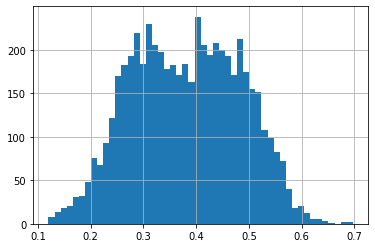

In [11]:
dfIDH_1991['IDHM'].hist(bins=50)

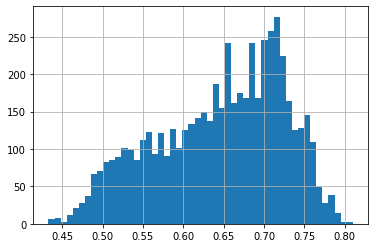

In [12]:
dfIDH_1991['IDHM_L'].hist(bins=50)

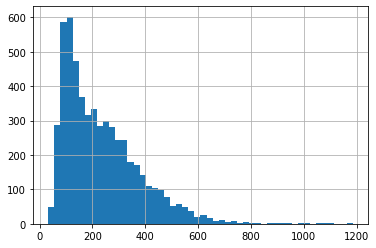

In [13]:
dfIDH_1991['RDPC'].hist(bins=50) # Renda per capita

In [14]:
dfIDH_1991[['RDPC','IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R']].corr()

,RDPC,IDHM,IDHM_E,IDHM_L,IDHM_R
RDPC,1.000000,0.851182,0.791423,0.710204,0.943227
IDHM,0.851182,1.000000,0.968659,0.801583,0.897720
IDHM_E,0.791423,0.968659,1.000000,0.684742,0.802412
IDHM_L,0.710204,0.801583,0.684742,1.000000,0.789020
IDHM_R,0.943227,0.897720,0.802412,0.789020,1.000000


In [15]:
dfIDH_2000[['RDPC','IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R']].corr()

,RDPC,IDHM,IDHM_E,IDHM_L,IDHM_R
RDPC,1.000000,0.878620,0.815036,0.773219,0.948658
IDHM,0.878620,1.000000,0.975847,0.870053,0.929387
IDHM_E,0.815036,0.975847,1.000000,0.782391,0.846917
IDHM_L,0.773219,0.870053,0.782391,1.000000,0.836550
IDHM_R,0.948658,0.929387,0.846917,0.836550,1.000000


In [16]:
dfIDH_2010[['RDPC','IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R']].corr()

,RDPC,IDHM,IDHM_E,IDHM_L,IDHM_R
RDPC,1.000000,0.907988,0.791389,0.784216,0.961664
IDHM,0.907988,1.000000,0.950875,0.852149,0.948321
IDHM_E,0.791389,0.950875,1.000000,0.704460,0.819628
IDHM_L,0.784216,0.852149,0.704460,1.000000,0.833867
IDHM_R,0.961664,0.948321,0.819628,0.833867,1.000000


## 5.1 Explorando o Índice Desenvolvimento Humano Municipal

In [17]:
dfIDH_2000.IDHM.describe()

count    5565.000000
mean        0.523481
std         0.104396
min         0.208000
25%         0.436000
50%         0.533000
75%         0.609000
max         0.820000
Name: IDHM, dtype: float64

## <font color = 'red'> 75% dos IDHM estão concentrados entre **0.436** e **0.609** 

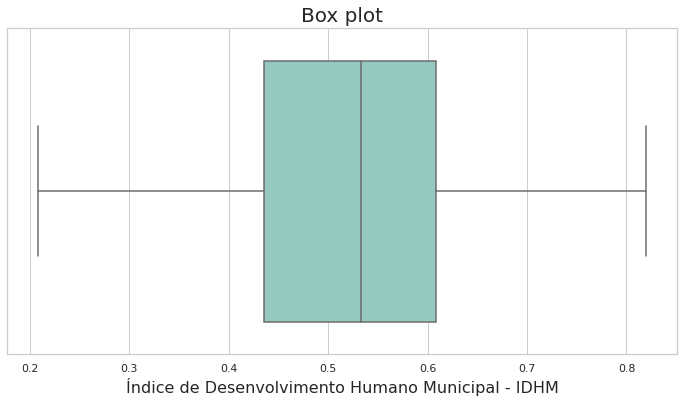

In [18]:
sns.set(style='whitegrid')
ax = sns.boxplot(data=dfIDH_2000, x='IDHM', width=0.8, linewidth=1.5,palette="Set3")
ax.figure.set_size_inches(12,6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('Índice de Desenvolvimento Humano Municipal - IDHM', fontsize=16)
ax

### <font color=green> Parece que os dados seguem quase uma distribuição normal. </font> 

<font color=blue> Quando vai chegando ao índice 0.500, vai diminuindo as frequências. Só que depois do 0.500, as frequências vão aumentando  </font>

Text(0.5, 0, 'Índice de Desenvolvimento Humano Municipal - IDHM')

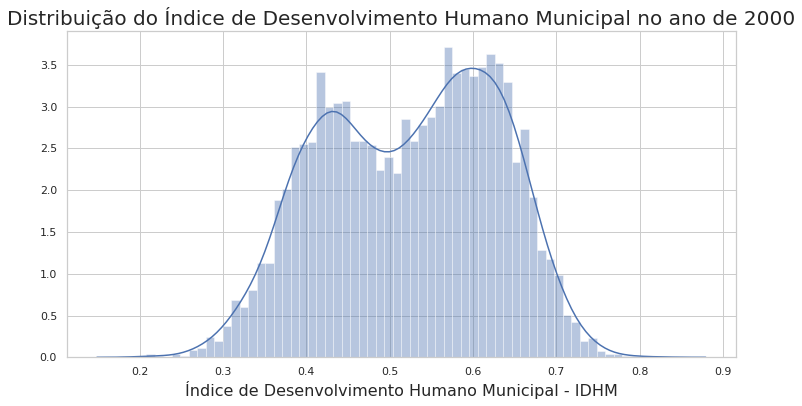

In [19]:
ax = sns.distplot(a=dfIDH_2000.IDHM, bins = 60)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição do Índice de Desenvolvimento Humano Municipal no ano de 2000', fontsize=20)
ax.set_xlabel('Índice de Desenvolvimento Humano Municipal - IDHM', fontsize=16)

## 5.2 Explorando Renda per Capita (RDPC)

In [20]:
dfIDH_2000.RDPC.describe()

count    5565.000000
mean      338.542322
std       192.443425
min        62.650000
25%       173.490000
50%       308.580000
75%       463.200000
max      1759.760000
Name: RDPC, dtype: float64

## <font color = 'red'> Justamente por ser uma variável de renda, é esperado que a concentração da Renda per Capita esteja nos menores valores. </font>

<font color = 'blue'> Vou analisar as Rendas Per Capitas que aparecem como "OutSiders" </color>

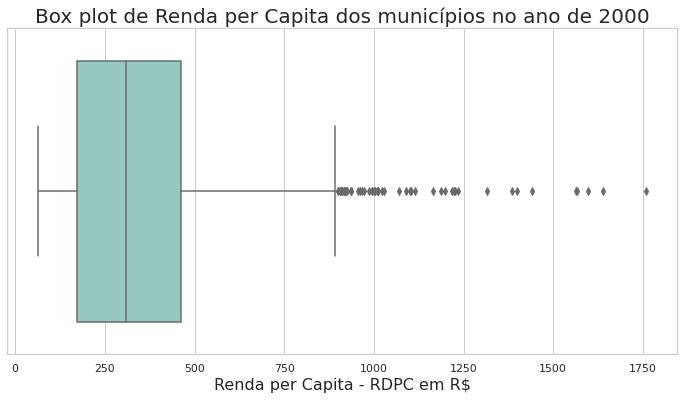

In [21]:
sns.set(style='whitegrid')
ax = sns.boxplot(data=dfIDH_2000, x='RDPC', width=0.8, linewidth=1.5,palette="Set3")
ax.figure.set_size_inches(12,6)
ax.set_title('Box plot de Renda per Capita dos municípios no ano de 2000', fontsize=20)
ax.set_xlabel('Renda per Capita - RDPC em R$', fontsize=16)
ax

### <font color = 'red'> Como disse no comentário acima, é esperado que o gráfico esteja com a distribuição maior do lado esquerdo. Justamente por ser distribuição de Renda Per Capita </font>

Text(0.5, 0, 'Renda per Capita - RDPC em (R$)')

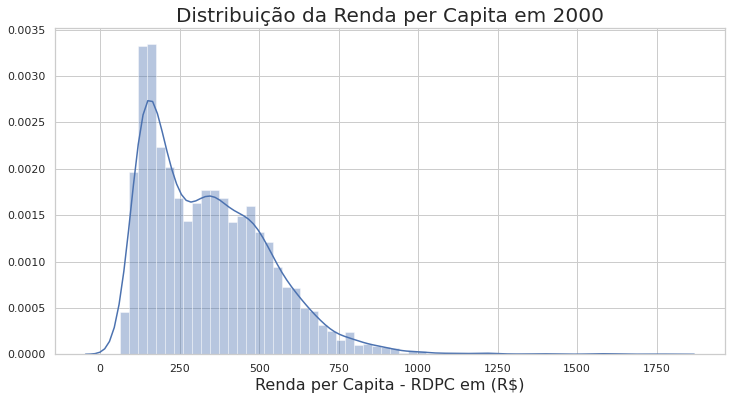

In [22]:
ax = sns.distplot(a=dfIDH_2000.RDPC, bins = 60)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição da Renda per Capita em 2000', fontsize=20)
ax.set_xlabel('Renda per Capita - RDPC em (R$)', fontsize=16)

### <font color = 'red'> Analisando as maiores rendas per capita. Não consegui tirar nenhum conclusão além do óbvio: São cidades com uma ótima infra-estrutura  </font>

In [23]:
colunas = ['Município','ESPVIDA','MORT1','RDPC','RDPC5','R2040','IDHM','IDHM_E', 'IDHM_L','IDHM_R', 'PRENTRAB','pesotot','T_AGUA','AGUA_ESGOTO','REN0',
           'REN1','REN2','REN3','PMPOB']
dfIDH_2000[colunas].sort_values(by='RDPC', ascending=False).head(10)  

,Município,ESPVIDA,MORT1,RDPC,RDPC5,R2040,IDHM,IDHM_E,IDHM_L,IDHM_R,PRENTRAB,pesotot,T_AGUA,AGUA_ESGOTO,REN0,REN1,REN2,REN3,PMPOB
3272,ÁGUAS DE SÃO PEDRO,77.18,11.40,1759.76,5380.11,15.71,0.791,0.657,0.870,0.867,62.48,1883,100.00,0.00,2.89,19.67,52.18,62.37,0.70
3811,SÃO CAETANO DO SUL,77.18,11.40,1639.93,4502.58,9.32,0.820,0.740,0.870,0.855,81.10,140159,99.36,0.00,1.31,8.44,33.33,44.98,1.38
3221,NITERÓI,72.26,14.04,1596.51,4871.07,16.80,0.771,0.684,0.788,0.851,67.53,459451,87.83,3.72,1.51,21.28,46.81,56.54,6.60
3794,SANTANA DE PARNAÍBA,73.29,17.40,1565.51,6064.71,32.53,0.713,0.530,0.805,0.848,84.07,74828,90.62,4.20,1.33,16.67,55.74,64.53,11.53
4336,BALNEÁRIO CAMBORIÚ,74.76,15.47,1563.49,5526.50,20.05,0.777,0.668,0.829,0.848,55.85,73455,99.24,0.68,2.16,18.50,55.66,66.47,6.63
3808,SANTOS,73.58,16.88,1441.86,4116.02,10.98,0.785,0.714,0.810,0.835,69.03,417983,98.76,0.14,1.39,13.72,42.60,54.51,3.49
4927,PORTO ALEGRE,73.65,16.04,1399.50,4449.41,17.45,0.744,0.612,0.811,0.830,71.52,1360590,97.39,1.02,1.47,20.22,49.72,60.41,8.49
4397,FLORIANÓPOLIS,74.35,18.26,1383.78,4154.77,13.85,0.766,0.660,0.823,0.828,70.53,342695,96.21,0.52,1.42,17.16,48.32,59.51,5.31
3173,VITÓRIA,70.74,26.73,1315.63,4154.64,18.93,0.759,0.700,0.762,0.820,73.51,292944,97.42,0.15,1.45,26.56,52.51,61.21,10.30
3902,VINHEDO,74.67,15.10,1235.29,3744.62,11.18,0.749,0.626,0.828,0.810,83.90,47215,98.97,0.04,0.96,12.88,49.35,63.67,3.93


In [24]:
dfIDH_2000[colunas].sample(n = 8, random_state = 25454)

,Município,ESPVIDA,MORT1,RDPC,RDPC5,R2040,IDHM,IDHM_E,IDHM_L,IDHM_R,PRENTRAB,pesotot,T_AGUA,AGUA_ESGOTO,REN0,REN1,REN2,REN3,PMPOB
918,BELA CRUZ,62.24,63.28,124.25,352.85,11.84,0.406,0.244,0.621,0.441,67.77,28358,28.39,31.07,13.53,89.32,95.75,97.22,74.07
2177,SÃO DESIDÉRIO,64.30,44.73,163.73,462.30,14.22,0.398,0.199,0.655,0.485,73.38,19325,47.32,4.58,7.73,68.34,92.54,96.92,60.62
5482,NOVA VENEZA,68.82,29.70,320.19,840.64,7.61,0.549,0.382,0.730,0.593,81.09,6414,94.31,1.59,4.63,63.69,89.11,93.45,26.21
1863,BARRA DO ROCHA,59.20,65.00,162.51,496.03,10.98,0.386,0.208,0.570,0.484,78.95,8302,35.68,24.73,2.44,83.26,94.65,96.57,70.07
1513,CHÃ GRANDE,65.84,54.20,190.04,486.38,7.32,0.427,0.224,0.681,0.509,72.61,18407,49.51,21.41,8.80,81.17,93.62,95.57,51.97
3885,TURMALINA,71.95,19.70,391.28,991.00,6.86,0.653,0.568,0.783,0.625,80.40,2366,99.21,0.00,6.18,51.64,80.18,87.83,15.81
3679,PEDERNEIRAS,72.58,18.60,519.74,1451.64,8.75,0.663,0.548,0.793,0.671,78.07,36614,97.56,0.09,1.02,35.48,72.80,81.11,12.07
3277,ALTINÓPOLIS,73.55,16.90,772.55,2662.55,15.09,0.658,0.479,0.809,0.734,85.02,15481,99.70,0.11,0.98,39.09,75.90,84.36,11.34


## 5.3 Analisando correlações das variáveis

In [0]:
colunas = ['Município','ESPVIDA','MORT1','RDPC','RDPC5','R2040','IDHM','IDHM_E', 'IDHM_L','IDHM_R', 'PRENTRAB','pesotot','T_AGUA','AGUA_ESGOTO','REN0',
           'REN1','REN2','REN3','PMPOB']

In [0]:
#dfIDH_2000[colunas].corr()

## <font color = 'blue'> Aqui na Reta de Regressão fica bem evidente que a partir de 800 R$ de renda per capita, a ***esperança de vida*** tende a ter uma correlação bem fraca com a ***Renda per Capita*** </font>

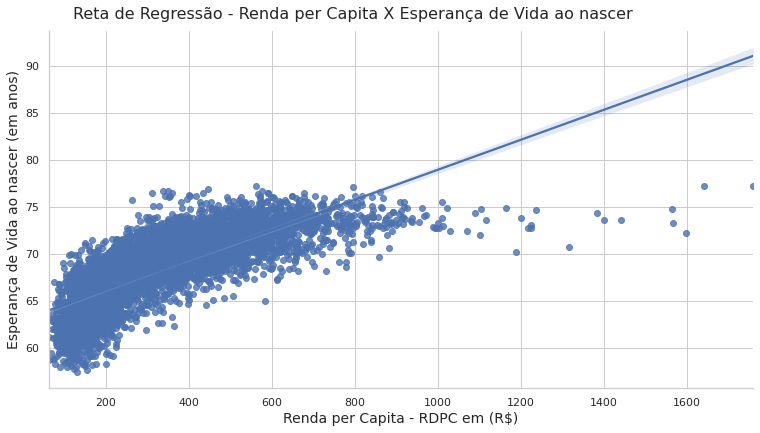

In [27]:
ax = sns.lmplot(data=dfIDH_2000,x='RDPC', y='ESPVIDA')
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Renda per Capita X Esperança de Vida ao nascer', fontsize=16, y=1.02)
ax.set_xlabels("Renda per Capita - RDPC em (R$)", fontsize=14)
ax.set_ylabels("Esperança de Vida ao nascer (em anos)", fontsize=14)



> ## <font color = 'blue'> Aqui na Reta de Regressão fica bem evidente que a partir de 650 R$ de renda per capita, a ***Mortalidade Infantil até 1 ano*** tende a ter uma correlação bem fraca com a ***Renda per Capita*** </font>

**Mortalidade Infantil até 1 ano -> quantidade de crianças até 1 ano que não deverão sobreviver a cada 1000 crianças nascidas vivas**


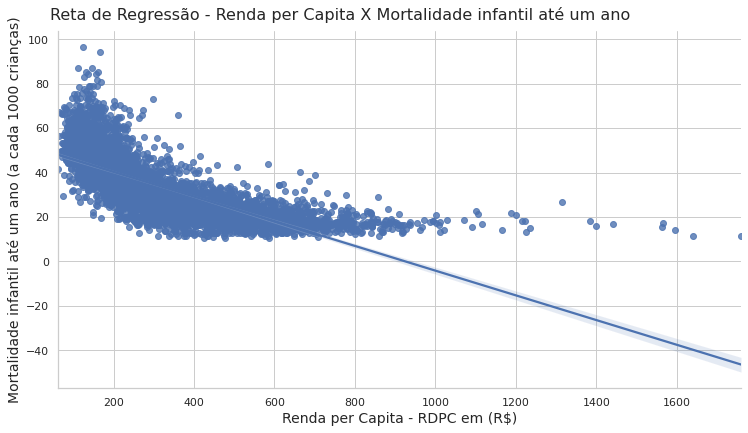

In [28]:
ax = sns.lmplot(data=dfIDH_2000,x='RDPC', y='MORT1')
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Renda per Capita X Mortalidade infantil até um ano', fontsize=16, y=1.02)
ax.set_xlabels("Renda per Capita - RDPC em (R$)", fontsize=14)
ax.set_ylabels("Mortalidade infantil até um ano (a cada 1000 crianças)", fontsize=14)



> ## <font color = 'blue'> A correção entre Renda per Capita e água encanada aqui é menos forte que as de cima.Aqui na Reta de Regressão também mostra que após uma certa Renda per Capita, a correção com a % população com água encanada fica bem fraca </font>



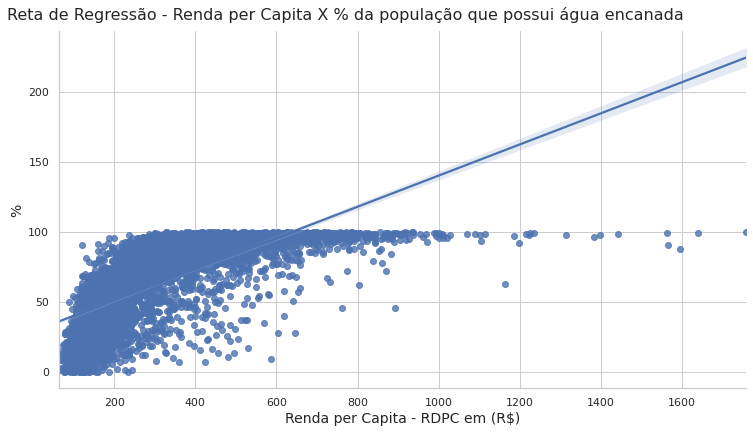

In [29]:
ax = sns.lmplot(data=dfIDH_2000,x='RDPC', y='T_AGUA')
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Renda per Capita X % da população que possui água encanada', fontsize=16, y=1.02)
ax.set_xlabels("Renda per Capita - RDPC em (R$)", fontsize=14)
ax.set_ylabels("%", fontsize=14)



> ## <font color = 'blue'> escreva aqui </font>



Text(0.5, 1.02, 'Reta de Regressão')

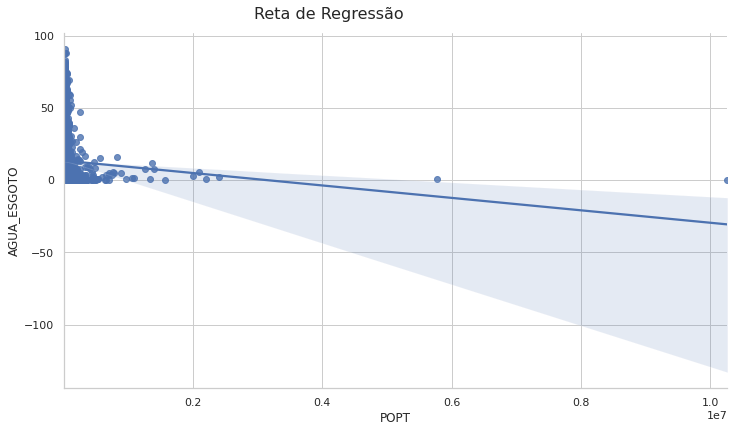

In [30]:
ax = sns.lmplot(data=dfIDH_2000,x='POPT', y='AGUA_ESGOTO')
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão', fontsize=16, y=1.02)

In [31]:
dfIDH_2000[['POPT','PPOB']].corr()

,POPT,PPOB
POPT,1.000000,-0.126067
PPOB,-0.126067,1.000000


In [32]:
colunas.append('PEA1014')
dfIDH_2000[colunas].sort_values(by='PEA1014', ascending=False).head(4)  

,Município,ESPVIDA,MORT1,RDPC,RDPC5,R2040,IDHM,IDHM_E,IDHM_L,IDHM_R,PRENTRAB,pesotot,T_AGUA,AGUA_ESGOTO,REN0,REN1,REN2,REN3,PMPOB,PEA1014
3828,SÃO PAULO,72.75,18.44,1216.54,3962.69,16.05,0.733,0.614,0.796,0.807,80.31,10437203,98.15,0.34,0.88,12.59,46.97,59.55,7.39,46823
2161,SALVADOR,69.64,36.35,685.87,2364.09,19.73,0.654,0.525,0.744,0.715,74.21,2443480,92.52,2.07,1.33,43.94,70.68,79.05,24.29,14479
3241,RIO DE JANEIRO,70.26,21.83,1187.08,3848.94,16.72,0.716,0.607,0.754,0.803,67.93,5857904,97.06,0.60,1.07,22.47,53.57,65.09,8.85,12943
948,FORTALEZA,69.63,34.57,610.48,2118.00,19.48,0.652,0.534,0.744,0.697,73.69,2135544,88.27,5.40,1.40,47.24,73.84,80.62,27.54,10214


In [33]:
dfIDH_2000[['RDPC','RMPOB']].corr()

,RDPC,RMPOB
RDPC,1.000000,0.747299
RMPOB,0.747299,1.000000


# 6. Definindo objetivos da minha análise

# <font color = 'red'>  Vou tentar prever a Renda per Capita a partir de variáveis de infra-estrutura da cidade como: </font>



*   **T_AGUA ->** % da população com água encanada
*   **AGUA_ESGOTO ->** % de pessoas em domicílios com abastecimento de água e esgotamento sanitário inadequados
*   **T_LIXO ->** % da população em domicílios com coleta de lixo
*   **T_LUZ ->** % da população em domicílios com energia elétrica
*   **T_BANAGUA ->** % da população em domicílios com banheiro e água encanada



In [34]:
colunas_analise = ['RDPC','T_AGUA','AGUA_ESGOTO','T_LIXO','T_LUZ','T_BANAGUA']
correlacoes = dfIDH_2000[colunas_analise].corr()['RDPC'].to_frame()[1:6]
correlacoes

,RDPC
T_AGUA,0.732029
AGUA_ESGOTO,-0.503222
T_LIXO,0.518954
T_LUZ,0.564849
T_BANAGUA,0.770363


In [0]:
def linear_regression_plot(param_x='', param_y=''):
  ax = sns.lmplot(data=dfIDH_2000,x=param_x, y=param_y)
  ax.fig.set_size_inches(12, 6)
  ax.fig.suptitle('Reta de Regressão', fontsize=16, y=1.02)

  return ax

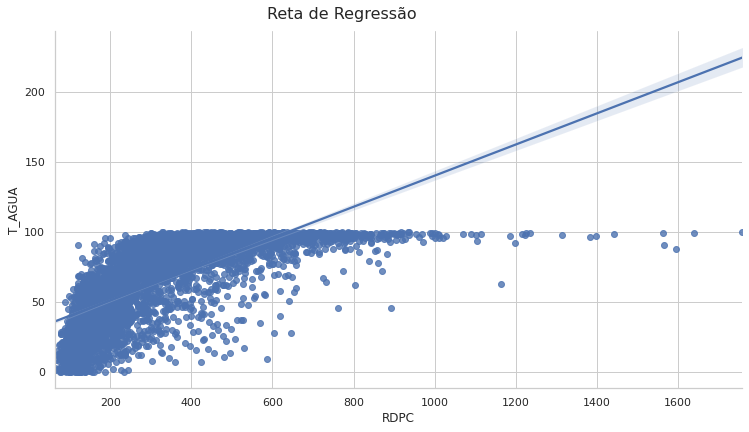

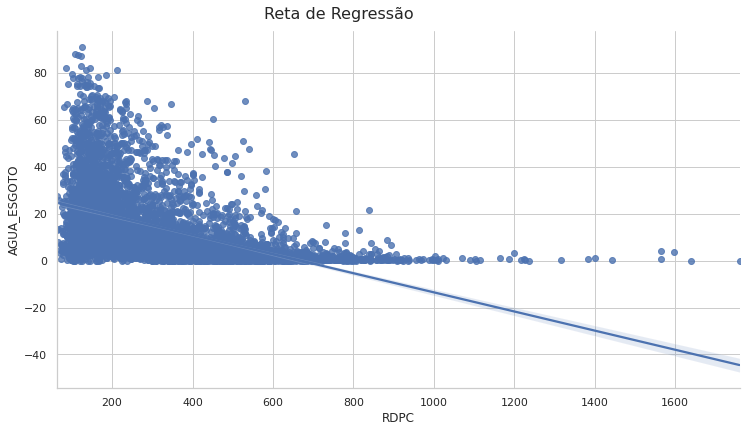

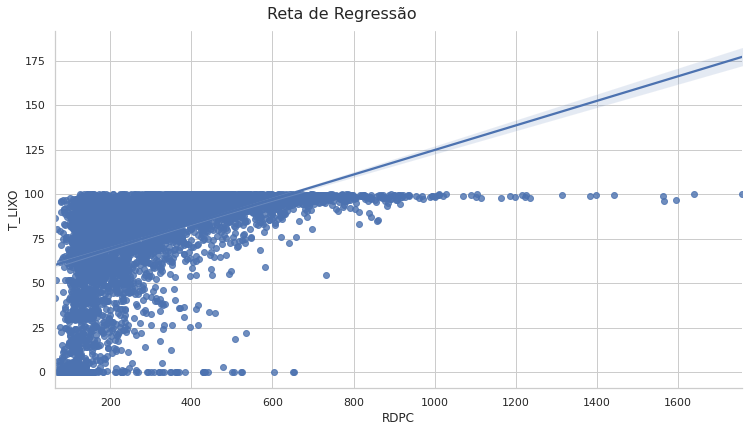

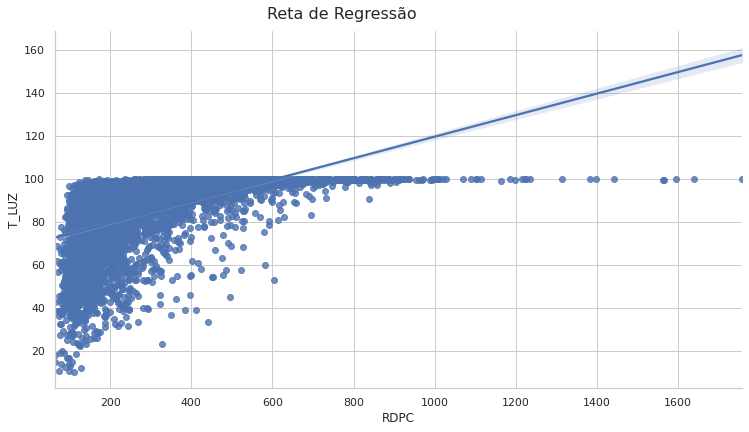

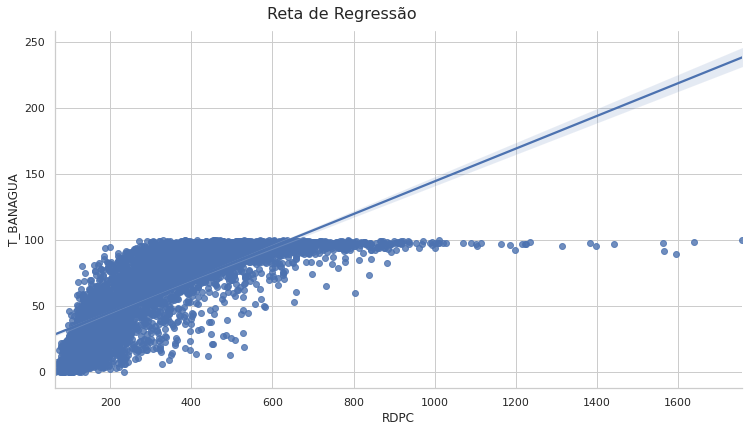

In [36]:
linear_regression_plot('RDPC','T_AGUA') 
linear_regression_plot('RDPC','AGUA_ESGOTO')
linear_regression_plot('RDPC','T_LIXO') 
linear_regression_plot('RDPC','T_LUZ')
linear_regression_plot('RDPC','T_BANAGUA') 

# 7. Aplicando 

In [0]:
colunas_analise = ['RDPC','T_AGUA','AGUA_ESGOTO','T_LIXO','T_LUZ','T_BANAGUA']

In [38]:
df = dfIDH_2000[colunas_analise]
df.head()

,RDPC,T_AGUA,AGUA_ESGOTO,T_LIXO,T_LUZ,T_BANAGUA
0,371.15,57.13,27.52,70.33,70.14,42.56
1,530.87,73.54,21.14,90.61,93.43,67.08
2,342.46,58.61,27.36,76.57,80.31,46.33
3,456.63,78.60,14.28,90.22,90.58,67.20
4,511.47,73.98,24.82,70.04,91.79,61.93


In [0]:
df_y = df[['RDPC']]
df_X = df[['T_AGUA','AGUA_ESGOTO','T_LIXO','T_LUZ','T_BANAGUA']]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=123)

In [41]:
X_test.describe()

,T_AGUA,AGUA_ESGOTO,T_LIXO,T_LUZ,T_BANAGUA
count,1670.000000,1670.000000,1670.000000,1670.000000,1670.000000
mean,67.586305,13.291168,79.438689,87.362539,63.693449
std,29.033759,15.880488,25.594119,16.593721,30.901027
min,0.000000,0.000000,0.000000,12.620000,0.000000
25%,42.982500,2.085000,71.525000,81.592500,34.730000
50%,79.385000,7.030000,90.565000,95.305000,73.855000
75%,93.570000,18.652500,97.227500,99.000000,92.390000
max,100.000000,87.810000,100.000000,100.000000,100.000000


In [42]:
modelo = xgboost.XGBRegressor(
                             #colsample_bytree=0.4,
                             #gamma=0,                 
                             learning_rate=0.1,
                             max_depth=3,
                             #min_child_weight=0.8,
                            n_estimators=100,                                                                    
                             reg_alpha=0.80,
                             #reg_lambda=0.45,
                             #subsample=0.6,
                             seed=180) 

modelo.fit(X_train, y_train)

y_previsto = modelo.predict(X_test)

erro_medio = np.sqrt(  mean_squared_error(y_test, y_previsto)  )

r2_Score = metrics.r2_score(y_test, y_previsto)

print(f"Erro médio de {erro_medio}")
print(f"R² da previsão {r2_Score}")

[21:26:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Erro médio de 114.70502325202254
R² da previsão 0.6615025330789903


In [43]:
len(y_previsto)

1670

In [44]:
len(y_test)

1670

In [45]:
df_test = X_test.join(other=y_test,how='left')
df_test

,T_AGUA,AGUA_ESGOTO,T_LIXO,T_LUZ,T_BANAGUA,RDPC
2394,95.27,1.34,97.15,98.39,94.65,464.32
3965,74.04,17.22,67.23,82.93,49.79,229.43
3363,97.15,1.07,99.22,99.37,96.24,555.87
1533,27.25,15.74,70.73,80.22,15.32,122.38
2769,35.81,17.64,80.04,69.94,33.37,153.25
...,...,...,...,...,...,...
1637,51.58,38.75,72.60,90.78,46.11,165.52
3649,99.08,0.32,100.00,100.00,98.07,402.55
1692,44.11,37.84,90.01,94.34,35.09,160.89
2903,95.61,1.20,99.55,95.85,96.31,534.12


In [46]:
df_test['RDPC_Previsto'] = y_previsto
df_test

,T_AGUA,AGUA_ESGOTO,T_LIXO,T_LUZ,T_BANAGUA,RDPC,RDPC_Previsto
2394,95.27,1.34,97.15,98.39,94.65,464.32,479.023712
3965,74.04,17.22,67.23,82.93,49.79,229.43,234.342636
3363,97.15,1.07,99.22,99.37,96.24,555.87,557.832520
1533,27.25,15.74,70.73,80.22,15.32,122.38,146.395859
2769,35.81,17.64,80.04,69.94,33.37,153.25,171.715454
...,...,...,...,...,...,...,...
1637,51.58,38.75,72.60,90.78,46.11,165.52,230.226212
3649,99.08,0.32,100.00,100.00,98.07,402.55,510.716400
1692,44.11,37.84,90.01,94.34,35.09,160.89,196.443710
2903,95.61,1.20,99.55,95.85,96.31,534.12,479.954071


In [47]:
df_test['RDPC_Residuos_Absoluto'] = np.sqrt(  (df_test.RDPC - df_test.RDPC_Previsto) ** 2  )
df_test

,T_AGUA,AGUA_ESGOTO,T_LIXO,T_LUZ,T_BANAGUA,RDPC,RDPC_Previsto,RDPC_Residuos_Absoluto
2394,95.27,1.34,97.15,98.39,94.65,464.32,479.023712,14.703712
3965,74.04,17.22,67.23,82.93,49.79,229.43,234.342636,4.912636
3363,97.15,1.07,99.22,99.37,96.24,555.87,557.832520,1.962520
1533,27.25,15.74,70.73,80.22,15.32,122.38,146.395859,24.015859
2769,35.81,17.64,80.04,69.94,33.37,153.25,171.715454,18.465454
...,...,...,...,...,...,...,...,...
1637,51.58,38.75,72.60,90.78,46.11,165.52,230.226212,64.706212
3649,99.08,0.32,100.00,100.00,98.07,402.55,510.716400,108.166400
1692,44.11,37.84,90.01,94.34,35.09,160.89,196.443710,35.553710
2903,95.61,1.20,99.55,95.85,96.31,534.12,479.954071,54.165929


In [48]:
df_test.RDPC_Residuos_Absoluto.mean()

74.86460320094676

In [49]:
df_test['RDPC_Residuos'] = df_test.RDPC - df_test.RDPC_Previsto
df_test

,T_AGUA,AGUA_ESGOTO,T_LIXO,T_LUZ,T_BANAGUA,RDPC,RDPC_Previsto,RDPC_Residuos_Absoluto,RDPC_Residuos
2394,95.27,1.34,97.15,98.39,94.65,464.32,479.023712,14.703712,-14.703712
3965,74.04,17.22,67.23,82.93,49.79,229.43,234.342636,4.912636,-4.912636
3363,97.15,1.07,99.22,99.37,96.24,555.87,557.832520,1.962520,-1.962520
1533,27.25,15.74,70.73,80.22,15.32,122.38,146.395859,24.015859,-24.015859
2769,35.81,17.64,80.04,69.94,33.37,153.25,171.715454,18.465454,-18.465454
...,...,...,...,...,...,...,...,...,...
1637,51.58,38.75,72.60,90.78,46.11,165.52,230.226212,64.706212,-64.706212
3649,99.08,0.32,100.00,100.00,98.07,402.55,510.716400,108.166400,-108.166400
1692,44.11,37.84,90.01,94.34,35.09,160.89,196.443710,35.553710,-35.553710
2903,95.61,1.20,99.55,95.85,96.31,534.12,479.954071,54.165929,54.165929


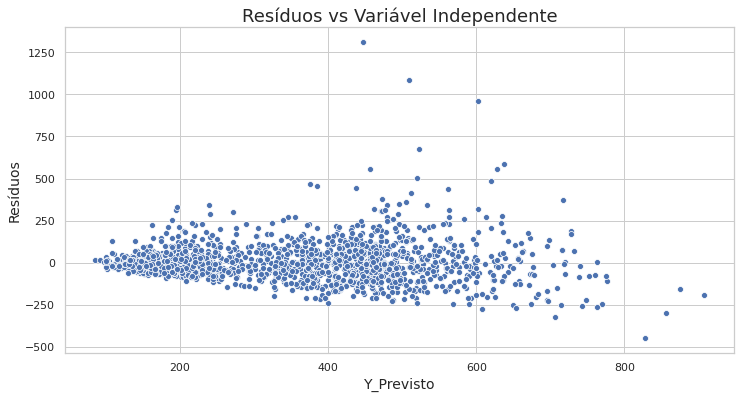

In [50]:
ax = sns.scatterplot(x=df_test.RDPC_Previsto, y=df_test.RDPC_Residuos)
ax.figure.set_size_inches(12,6)
ax.set_title('Resíduos vs Variável Independente', fontsize=18)
ax.set_xlabel('Y_Previsto', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

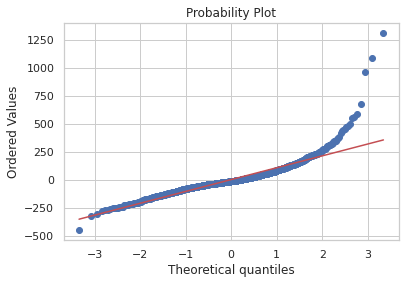

In [51]:
(_, (_, _, _)) = probplot(df_test.RDPC_Residuos, plot = plt)

In [0]:
caminho_arquivo_funcoes_previsao =  "https://github.com/EmersonFranca/IDH_Atlas/blob/master/Funcoes/Funcoes_para_Previsao.ipynb"

In [0]:
from pacote import 

In [0]:
files.op